In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Link for the dataset: https://www.kaggle.com/code/neilclack/taxi-trip-cleaning-analysis/data

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data = pd.read_csv("/content/drive/My Drive/new.csv",skipinitialspace = True)
print(data)

              id  trip_distance  extra  mta_tax  tip_amount  tolls_amount  \
0              3          16.97    0.0      0.5        5.61          5.76   
1              4          14.45    0.0      0.5       10.41          5.76   
2              5          11.60    0.0      0.5       14.57          5.76   
3             10           5.10    1.0      0.5        5.65          0.00   
4             12          11.11    1.0      0.5       10.61          5.76   
...          ...            ...    ...      ...         ...           ...   
1048570  1090735           8.50    0.0      0.5        6.15          0.00   
1048571  1090736           9.20    0.0      0.5        7.00          5.76   
1048572  1090737           7.60    0.0      0.5        5.35          0.00   
1048573  1090738          13.40    0.0      0.5        9.45          0.00   
1048574  1090739           7.10    0.0      0.5        5.76          0.00   

         imp_surcharge  total_amount  pickup_location_id  dropoff_location_

"data" is used to view the different details of the dataset namely the columns present, number of rows, columnse etc


"shape" is used to obtain the number of rows and columns present in the given dataset

In [ ]:
data.shape

(1048575, 19)

"info()" is used to provide the summary of the dataframe

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1048575 non-null  int64  
 1   trip_distance            1048575 non-null  float64
 2   extra                    1048575 non-null  float64
 3   mta_tax                  1048575 non-null  float64
 4   tip_amount               1048575 non-null  float64
 5   tolls_amount             1048575 non-null  float64
 6   imp_surcharge            1048575 non-null  float64
 7   total_amount             1048575 non-null  float64
 8   pickup_location_id       1048575 non-null  int64  
 9   dropoff_location_id      1048575 non-null  int64  
 10  year                     1048575 non-null  int64  
 11  month                    1048575 non-null  int64  
 12  day                      1048575 non-null  int64  
 13  day_of_week              1048575 non-null 

"head()" is used to obtain the first 5 rows by default where n = 5

In [ ]:
data.head()

,id,trip_distance,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,passenger_count,fare_amount
0,3,16.97,0.0,0.5,5.61,5.76,0.3,61.67,231,138,2018,3,29,3,13,3317,61.67,3.0,49.5
1,4,14.45,0.0,0.5,10.41,5.76,0.3,62.47,87,138,2018,3,29,3,14,3648,62.47,2.0,45.5
2,5,11.60,0.0,0.5,14.57,5.76,0.3,63.13,68,138,2018,3,29,3,14,3540,63.13,3.0,42.0
3,10,5.10,1.0,0.5,5.65,0.00,0.3,33.95,186,33,2018,3,29,3,16,2585,33.95,2.0,26.5
4,12,11.11,1.0,0.5,10.61,5.76,0.3,63.67,163,138,2018,3,29,3,16,4521,63.67,5.0,45.5


"isnull().sum()" returns the number of missing values in the dataset

In [ ]:
data.isnull().sum()

id                               0
trip_distance                    0
extra                            0
mta_tax                          0
tip_amount                       0
tolls_amount                     0
imp_surcharge                    0
total_amount                     0
pickup_location_id               0
dropoff_location_id              0
year                             0
month                            0
day                              0
day_of_week                      0
hour_of_day                      0
trip_duration                    0
calculated_total_amount          0
passenger_count            1020578
fare_amount                      0
dtype: int64

In [ ]:
data['passenger_count']=data['passenger_count'].fillna(data['passenger_count'].mean())
data['passenger_count']= round(data['passenger_count'])
data['passenger_count']

0          3.0
1          2.0
2          3.0
3          2.0
4          5.0
          ... 
1048570    4.0
1048571    4.0
1048572    4.0
1048573    4.0
1048574    4.0
Name: passenger_count, Length: 1048575, dtype: float64

"dropna()" removes the rows containing NULL values

In [ ]:
data=data.dropna()
data

,id,trip_distance,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,passenger_count,fare_amount
0,3,16.97,0.0,0.5,5.61,5.76,0.3,61.67,231,138,2018,3,29,3,13,3317,61.67,3.0,49.5
1,4,14.45,0.0,0.5,10.41,5.76,0.3,62.47,87,138,2018,3,29,3,14,3648,62.47,2.0,45.5
2,5,11.60,0.0,0.5,14.57,5.76,0.3,63.13,68,138,2018,3,29,3,14,3540,63.13,3.0,42.0
3,10,5.10,1.0,0.5,5.65,0.00,0.3,33.95,186,33,2018,3,29,3,16,2585,33.95,2.0,26.5
4,12,11.11,1.0,0.5,10.61,5.76,0.3,63.67,163,138,2018,3,29,3,16,4521,63.67,5.0,45.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1090735,8.50,0.0,0.5,6.15,0.00,0.3,36.95,238,88,2018,4,4,2,10,1462,36.30,4.0,30.0
1048571,1090736,9.20,0.0,0.5,7.00,5.76,0.3,42.06,138,170,2018,4,4,2,11,2303,22.80,4.0,28.5
1048572,1090737,7.60,0.0,0.5,5.35,0.00,0.3,32.15,237,13,2018,6,16,5,15,2010,29.80,4.0,26.0
1048573,1090738,13.40,0.0,0.5,9.45,0.00,0.3,56.75,132,181,2018,6,16,5,18,2168,50.80,4.0,46.5


"data.plot.hist()" is used to draw the histogram corresponding to dataframe's columns

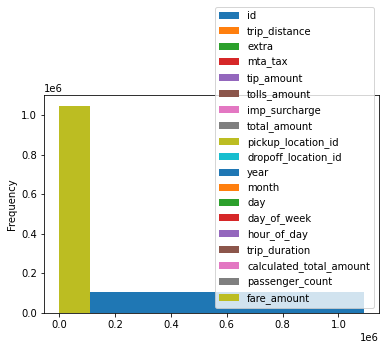

In [ ]:
data.plot.hist()

"data.value_counts()" returns the objects having count of unique value

In [ ]:
values = data.value_counts()
values

id       trip_distance  extra  mta_tax  tip_amount  tolls_amount  imp_surcharge  total_amount  pickup_location_id  dropoff_location_id  year  month  day  day_of_week  hour_of_day  trip_duration  calculated_total_amount  passenger_count  fare_amount
3        16.97          0.0    0.5      5.61        5.76          0.3            61.67         231                 138                  2018  3      29   3            13           3317           61.67                    3.0              49.50          1
724577   17.60          0.0    0.5      13.70       5.76          0.3            82.26         138                 48                   2018  2      15   3            10           1033           24.30                    4.0              62.00          1
724563   5.21           0.5    0.5      2.50        0.00          0.3            25.30         234                 7                    2018  2      14   2            21           1764           40.80                    4.0              21.50 

"subplot" helps in plotting multiple plots on a single figure

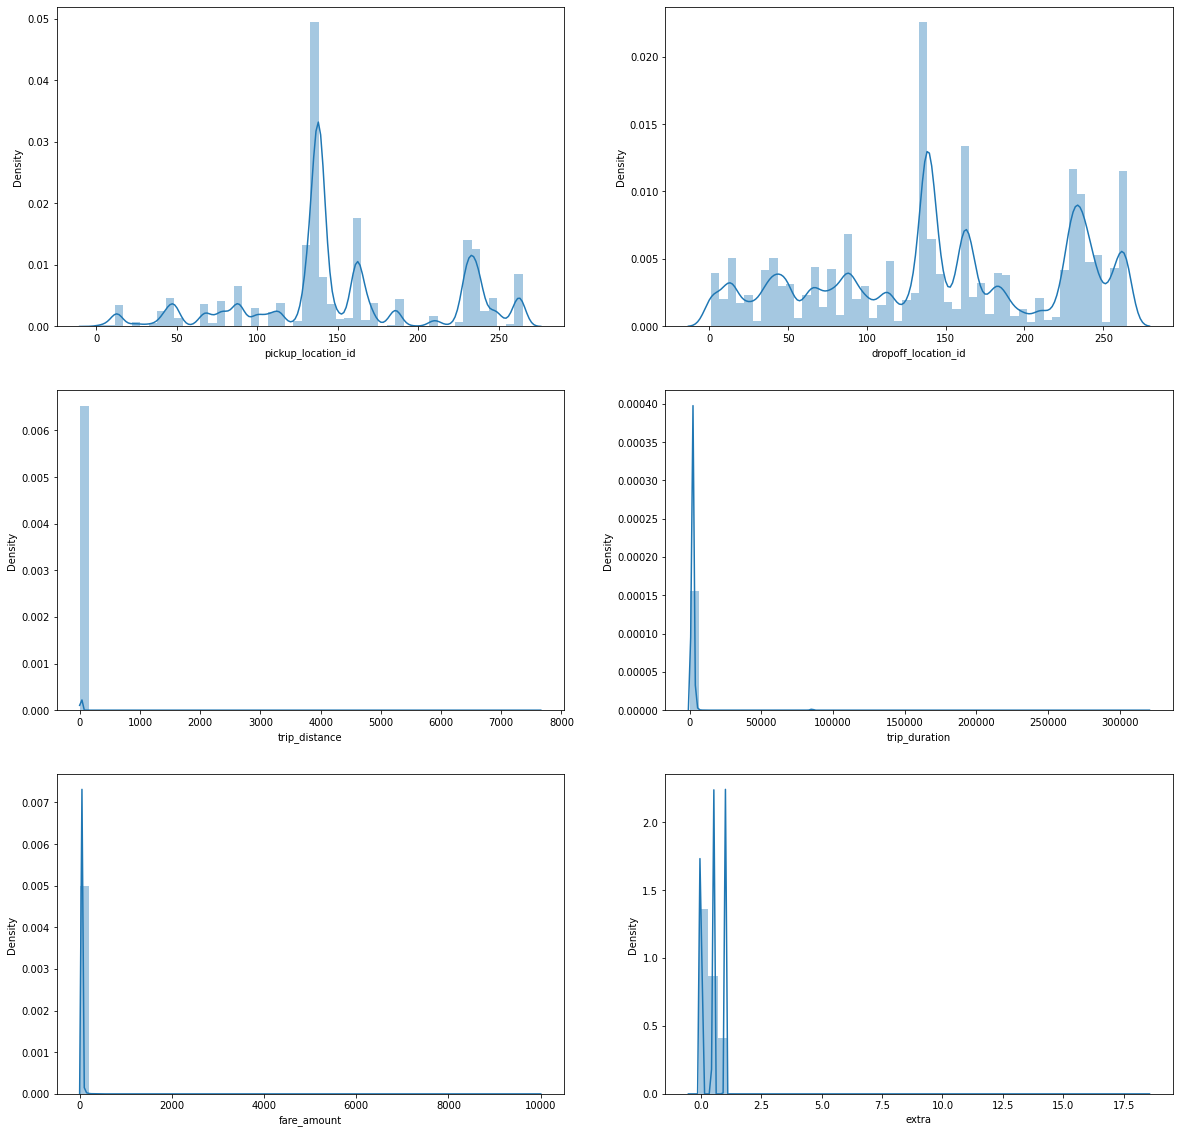

In [ ]:
plt.figure(figsize = (20, 20))

plt.subplot(321)
_ = sns.distplot(data['pickup_location_id'])

plt.subplot(322)
_ = sns.distplot(data['dropoff_location_id'])

plt.subplot(323)
_ = sns.distplot(data['trip_distance'])

plt.subplot(324)
_ = sns.distplot(data['trip_duration'])

plt.subplot(325)
_ = sns.distplot(data['fare_amount'])

plt.subplot(326)
_ = sns.distplot(data['extra'])

plt.show()

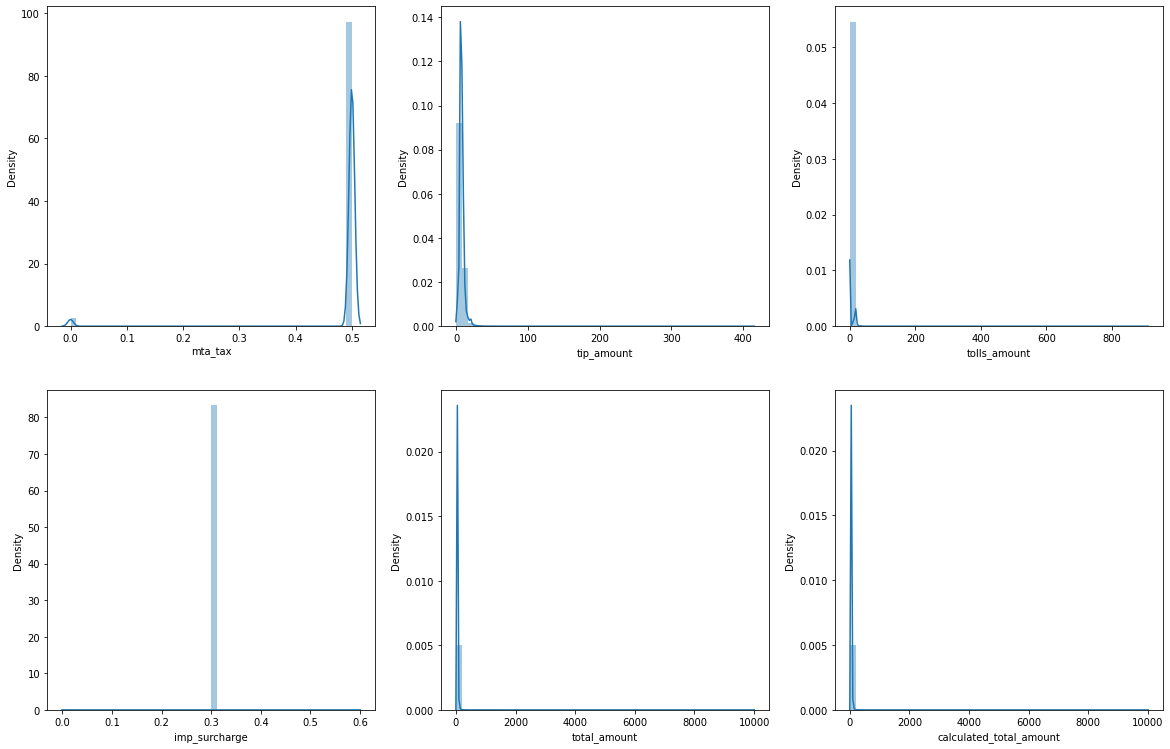

In [ ]:
plt.figure(figsize = (20, 20))

plt.subplot(331)
_ = sns.distplot(data['mta_tax'])

plt.subplot(332)
_ = sns.distplot(data['tip_amount'])

plt.subplot(333)
_ = sns.distplot(data['tolls_amount'])

plt.subplot(334)
_ = sns.distplot(data['imp_surcharge'])

plt.subplot(335)
_ = sns.distplot(data['total_amount'])

plt.subplot(336)
_ = sns.distplot(data['calculated_total_amount'])

plt.show()

"violinplot" is used to observe the numeric distribution of the dataset



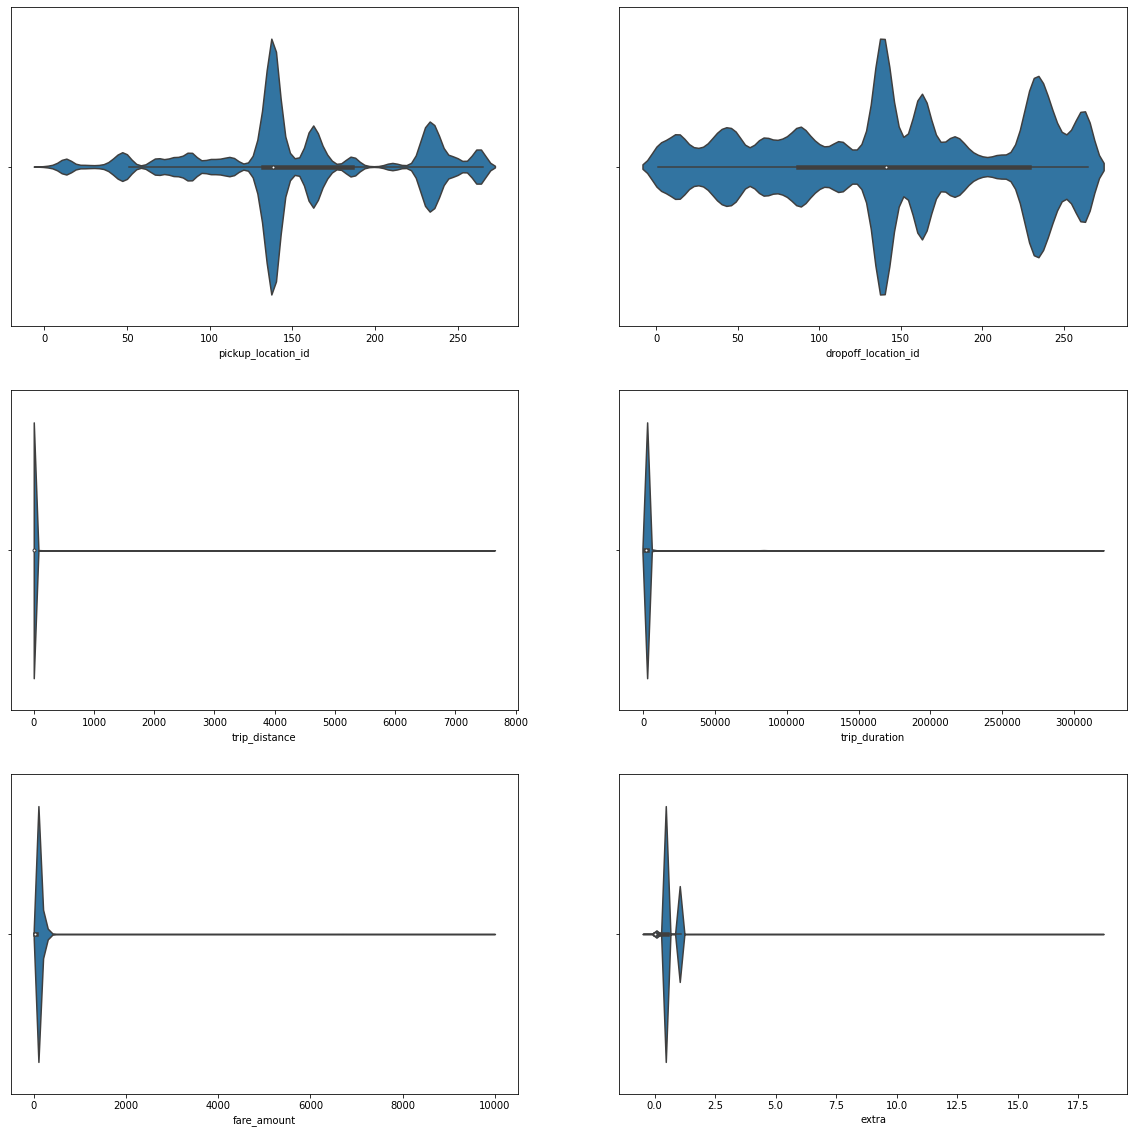

In [ ]:
plt.figure(figsize = (20, 20))

plt.subplot(321)
_ = sns.violinplot(data['pickup_location_id'])

plt.subplot(322)
_ = sns.violinplot(data['dropoff_location_id'])

plt.subplot(323)
_ = sns.violinplot(data['trip_distance'])

plt.subplot(324)
_ = sns.violinplot(data['trip_duration'])

plt.subplot(325)
_ = sns.violinplot(data['fare_amount'])

plt.subplot(326)
_ = sns.violinplot(data['extra'])

plt.show()

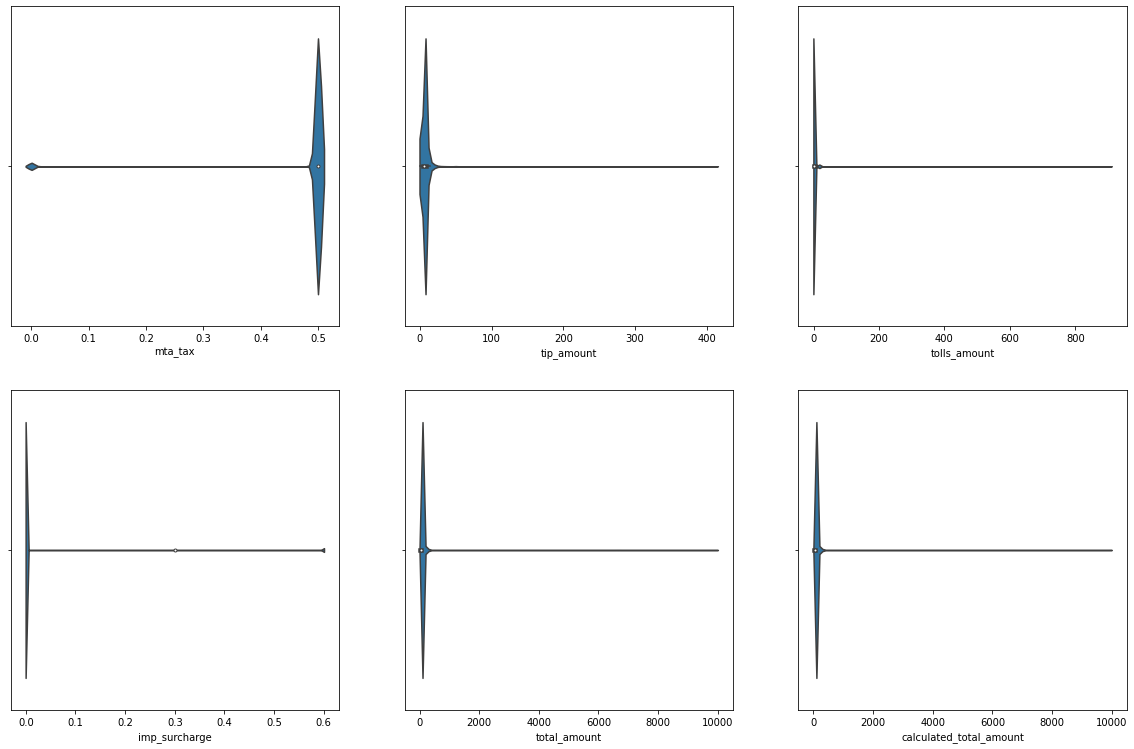

In [ ]:
plt.figure(figsize = (20, 20))

plt.subplot(331)
_ = sns.violinplot(data['mta_tax'])

plt.subplot(332)
_ = sns.violinplot(data['tip_amount'])

plt.subplot(333)
_ = sns.violinplot(data['tolls_amount'])

plt.subplot(334)
_ = sns.violinplot(data['imp_surcharge'])

plt.subplot(335)
_ = sns.violinplot(data['total_amount'])

plt.subplot(336)
_ = sns.violinplot(data['calculated_total_amount'])

plt.show()

"pairplot" is used to plot multiple bivariate distribution in a given dataset

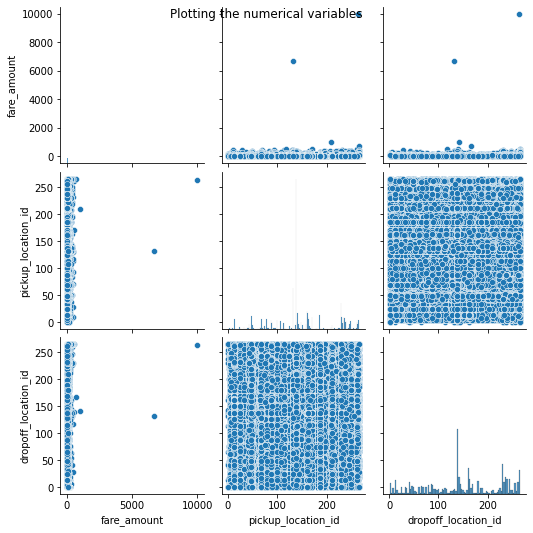

In [ ]:
variables = ['fare_amount','pickup_location_id','dropoff_location_id']

a = sns.pairplot(data = data[variables], kind = 'scatter', dropna = True)
a.fig.suptitle('Plotting the numerical variables')
plt.show()

We check if the the values are within desired range 

1. We check if the fare_amount has a negative value as the cost cannot be negative and must be  positive

In [ ]:
data['fare_amount']<1

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Name: fare_amount, Length: 1048575, dtype: bool

2. Also, sum of all the outliers having negative result for fare_amount is zero or none of them have negative vaues

In [ ]:
sum(data['fare_amount']<1)

158

3. Checking out the various statistics of the dataset, namely checking the trips where the distance travelled is greater than a particular value or it the pickup location ID is greater than a beyond limit and if the dropoff location ID is above a certian value

In [ ]:
print('Distance above 50: {}'.format(sum(data['trip_distance']>50)))
print('Distance above 60: {}'.format(sum(data['trip_distance']>60)))
print('Distance above 70: {}'.format(sum(data['trip_distance']>70)))
print('Distance above 80: {}'.format(sum(data['trip_distance']>80)))
print('\n')

print('Pickup Location ID above 50: {}'.format(sum(data['pickup_location_id']>50)))
print('Pickup Location ID above 100: {}'.format(sum(data['pickup_location_id']>100)))
print('Pickup Location ID above 150: {}'.format(sum(data['pickup_location_id']>150)))
print('Pickup Location ID above 200: {}'.format(sum(data['pickup_location_id']>200)))
print('Pickup Location ID above 250: {}'.format(sum(data['pickup_location_id']>250)))
print('Pickup Location ID above 300: {}'.format(sum(data['pickup_location_id']>300)))
print('\n')

print('Dropoff Location ID above 50: {}'.format(sum(data['dropoff_location_id']>50)))
print('Dropoff Location ID above 100: {}'.format(sum(data['dropoff_location_id']>100)))
print('Dropoff Location ID above 150: {}'.format(sum(data['dropoff_location_id']>150)))
print('Dropoff Location ID above 200: {}'.format(sum(data['dropoff_location_id']>200)))
print('Dropoff Location ID above 250: {}'.format(sum(data['dropoff_location_id']>250)))
print('Dropoff Location ID above 300: {}'.format(sum(data['dropoff_location_id']>300)))
print('\n')

print('Passenger count above 1: {}'.format(sum(data['passenger_count']>1)))
print('Passenger count above 2: {}'.format(sum(data['passenger_count']>2)))
print('Passenger count above 3: {}'.format(sum(data['passenger_count']>3)))
print('Passenger count above 4: {}'.format(sum(data['passenger_count']>4)))
print('Passenger count above 5: {}'.format(sum(data['passenger_count']>5)))
print('Passenger count above 6: {}'.format(sum(data['passenger_count']>6)))
print('Passenger count above 7: {}'.format(sum(data['passenger_count']>7)))

Distance above 50: 366
Distance above 60: 153
Distance above 70: 74
Distance above 80: 38


Pickup Location ID above 50: 972902
Pickup Location ID above 100: 871025
Pickup Location ID above 150: 418198
Pickup Location ID above 200: 251477
Pickup Location ID above 250: 50161
Pickup Location ID above 300: 0


Dropoff Location ID above 50: 882432
Dropoff Location ID above 100: 735548
Dropoff Location ID above 150: 486016
Dropoff Location ID above 200: 307136
Dropoff Location ID above 250: 89019
Dropoff Location ID above 300: 0


Passenger count above 1: 1044565
Passenger count above 2: 1040511
Passenger count above 3: 1036498
Passenger count above 4: 11964
Passenger count above 5: 8025
Passenger count above 6: 4012
Passenger count above 7: 0


4. Remove the rows in the dataset where number of passengers can only be between 1 and 6. If value is either greater than 6 and less than 1, then remove them 

In [ ]:
train1 = data.drop(data[data['passenger_count']>6].index, axis=0)
train2 = data.drop(data[data['passenger_count']<1].index, axis=0)


In [ ]:
train1

,id,trip_distance,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,passenger_count,fare_amount
0,3,16.97,0.0,0.5,5.61,5.76,0.3,61.67,231,138,2018,3,29,3,13,3317,61.67,3.0,49.5
1,4,14.45,0.0,0.5,10.41,5.76,0.3,62.47,87,138,2018,3,29,3,14,3648,62.47,2.0,45.5
2,5,11.60,0.0,0.5,14.57,5.76,0.3,63.13,68,138,2018,3,29,3,14,3540,63.13,3.0,42.0
3,10,5.10,1.0,0.5,5.65,0.00,0.3,33.95,186,33,2018,3,29,3,16,2585,33.95,2.0,26.5
4,12,11.11,1.0,0.5,10.61,5.76,0.3,63.67,163,138,2018,3,29,3,16,4521,63.67,5.0,45.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1090735,8.50,0.0,0.5,6.15,0.00,0.3,36.95,238,88,2018,4,4,2,10,1462,36.30,4.0,30.0
1048571,1090736,9.20,0.0,0.5,7.00,5.76,0.3,42.06,138,170,2018,4,4,2,11,2303,22.80,4.0,28.5
1048572,1090737,7.60,0.0,0.5,5.35,0.00,0.3,32.15,237,13,2018,6,16,5,15,2010,29.80,4.0,26.0
1048573,1090738,13.40,0.0,0.5,9.45,0.00,0.3,56.75,132,181,2018,6,16,5,18,2168,50.80,4.0,46.5


In [ ]:
train2

,id,trip_distance,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,passenger_count,fare_amount
0,3,16.97,0.0,0.5,5.61,5.76,0.3,61.67,231,138,2018,3,29,3,13,3317,61.67,3.0,49.5
1,4,14.45,0.0,0.5,10.41,5.76,0.3,62.47,87,138,2018,3,29,3,14,3648,62.47,2.0,45.5
2,5,11.60,0.0,0.5,14.57,5.76,0.3,63.13,68,138,2018,3,29,3,14,3540,63.13,3.0,42.0
3,10,5.10,1.0,0.5,5.65,0.00,0.3,33.95,186,33,2018,3,29,3,16,2585,33.95,2.0,26.5
4,12,11.11,1.0,0.5,10.61,5.76,0.3,63.67,163,138,2018,3,29,3,16,4521,63.67,5.0,45.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1090735,8.50,0.0,0.5,6.15,0.00,0.3,36.95,238,88,2018,4,4,2,10,1462,36.30,4.0,30.0
1048571,1090736,9.20,0.0,0.5,7.00,5.76,0.3,42.06,138,170,2018,4,4,2,11,2303,22.80,4.0,28.5
1048572,1090737,7.60,0.0,0.5,5.35,0.00,0.3,32.15,237,13,2018,6,16,5,15,2010,29.80,4.0,26.0
1048573,1090738,13.40,0.0,0.5,9.45,0.00,0.3,56.75,132,181,2018,6,16,5,18,2168,50.80,4.0,46.5


5. Removing pickup location ID when value is greater than 90

In [ ]:
data = data.drop(data[data['pickup_location_id']>90].index, axis=0)
for i in ['pickup_location_id','dropoff_location_id']:
    train = data.drop(data[data[i]==0].index, axis=0)

Analysing the missing values

In [ ]:
missing_val = pd.DataFrame(data.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,id,0
1,trip_distance,0
2,extra,0
3,mta_tax,0
4,tip_amount,0
5,tolls_amount,0
6,imp_surcharge,0
7,total_amount,0
8,pickup_location_id,0
9,dropoff_location_id,0


In [ ]:
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val['Missing_percentage'] = (missing_val['Missing_percentage'] / len(data))*100
missing_val

,Variables,Missing_percentage
0,id,0.0
1,trip_distance,0.0
2,extra,0.0
3,mta_tax,0.0
4,tip_amount,0.0
5,tolls_amount,0.0
6,imp_surcharge,0.0
7,total_amount,0.0
8,pickup_location_id,0.0
9,dropoff_location_id,0.0


As missing values in a dataset can cause trouble, we replace suh values with a numeric calue which is known as Imputed Mean and Imputed Median

In [ ]:
print('Value if imputed with mean: {}'.format(data['fare_amount'].fillna(data['fare_amount'].mean()).loc[1000]))
print('Value if imputed with median: {}'.format(data['fare_amount'].fillna(data['fare_amount'].median()).loc[1000]))

Value if imputed with mean: 26.5
Value if imputed with median: 26.5


Calculate the mean and standard deviation of the dataset

In [ ]:
data.mean()

id                         543016.372779
trip_distance                   8.044441
extra                           0.324890
mta_tax                         0.483419
tip_amount                      5.466568
tolls_amount                    1.301458
imp_surcharge                   0.299972
total_amount                   37.464921
pickup_location_id             58.066778
dropoff_location_id           144.134340
year                         2018.000000
month                           6.346613
day                            15.825622
day_of_week                     3.088920
hour_of_day                    13.189738
trip_duration                2215.749913
calculated_total_amount        41.487632
passenger_count                 3.999664
fare_amount                    29.570940
dtype: float64

In [ ]:
data.std()

id                         314624.109987
trip_distance                   4.208179
extra                           0.385503
mta_tax                         0.089529
tip_amount                      4.316957
tolls_amount                    4.404630
imp_surcharge                   0.003087
total_amount                   18.999453
pickup_location_id             25.832281
dropoff_location_id            76.763314
year                            0.000000
month                           3.416040
day                             8.579353
day_of_week                     1.879545
hour_of_day                     6.780161
trip_duration                4815.574637
calculated_total_amount        19.679282
passenger_count                 0.316890
fare_amount                    14.090472
dtype: float64

In [ ]:
columns = ['fare_amount', 'pickup_location_id', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']

Analysing the outliers using boxplot

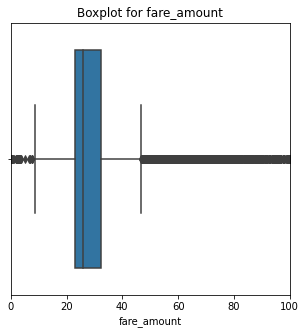

In [ ]:
plt.figure(figsize = (5, 5)) 
plt.xlim(0, 100)
plt.ylim(0,100)
sns.boxplot(x = data['fare_amount'], data = data, orient = 'h')
plt.title('Boxplot for fare_amount')
plt.show()

In [ ]:
sum(data['fare_amount'])

4747555.229999987

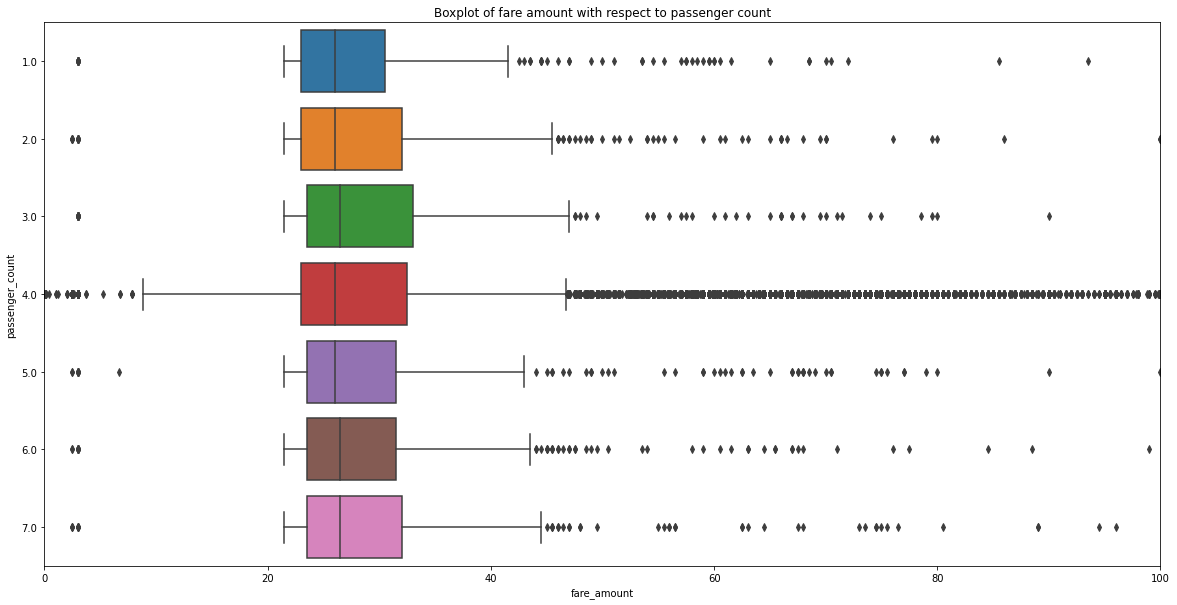

In [ ]:
plt.figure(figsize = (20, 10))
plt.xlim(0, 100)
plt.ylim(0, 100)
_ = sns.boxplot(x = data['fare_amount'], y = data['passenger_count'], data = data, orient = 'h')
plt.title('Boxplot of fare amount with respect to passenger count')
plt.show()

From the above results of boxplots, we observe that there are outliers present in the train dataset

In [ ]:
def outlier_treatment(col):

    q75, q25 = np.percentile(data[col], [75 ,25])
    print(q75,q25)
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    data.loc[data[col] < minimum,col] = np.nan
    data.loc[data[col] > maximum,col] = np.nan

In [ ]:
pd.DataFrame(data.isnull().sum())

,0
id,0
trip_distance,0
extra,0
mta_tax,0
tip_amount,0
tolls_amount,0
imp_surcharge,0
total_amount,0
pickup_location_id,0
dropoff_location_id,0


Feature Engineering

1. Feature Engineering for the timestamp variable



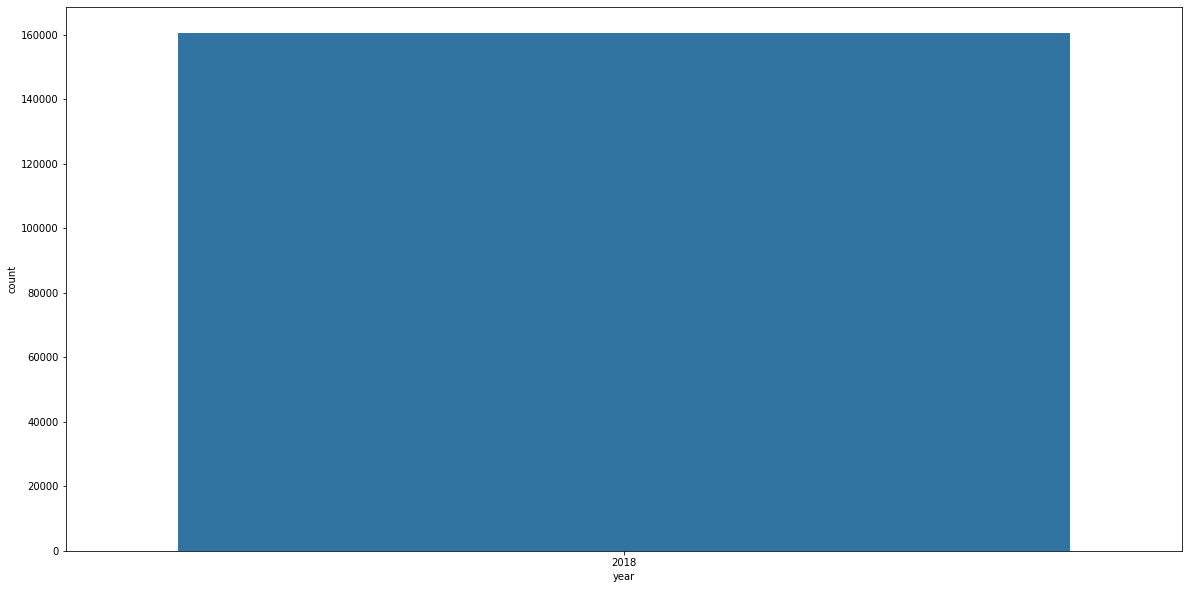

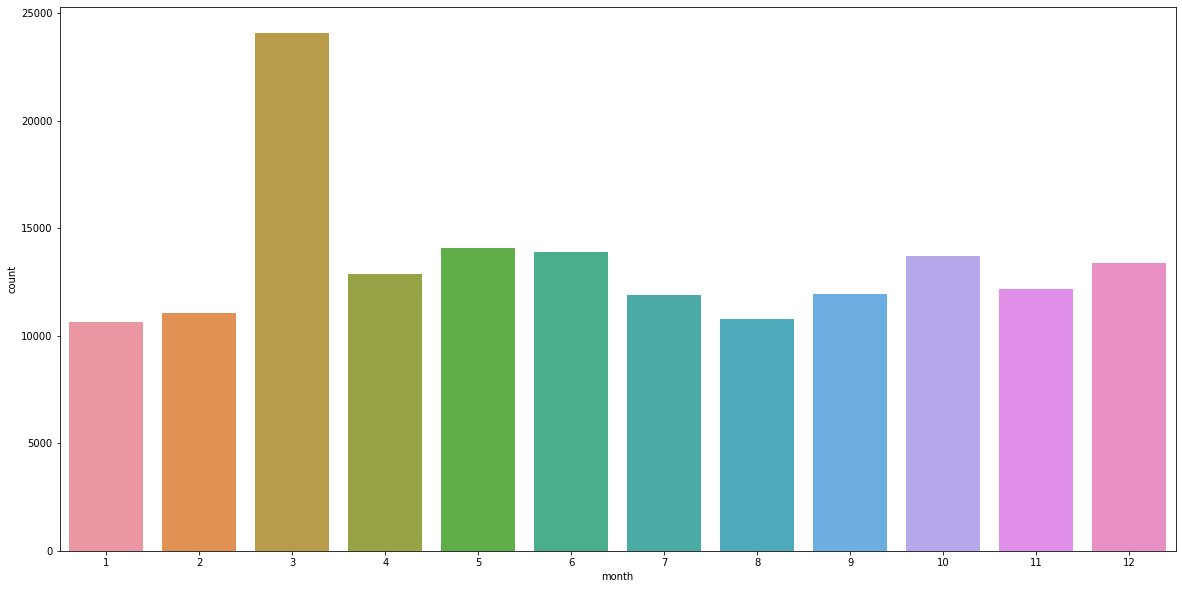

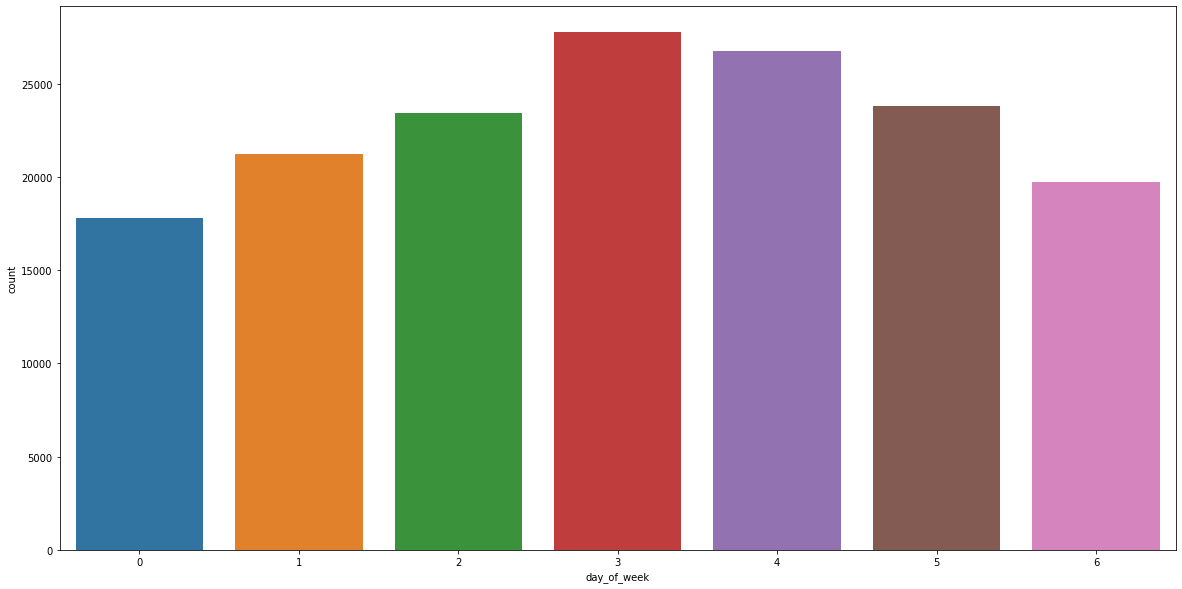

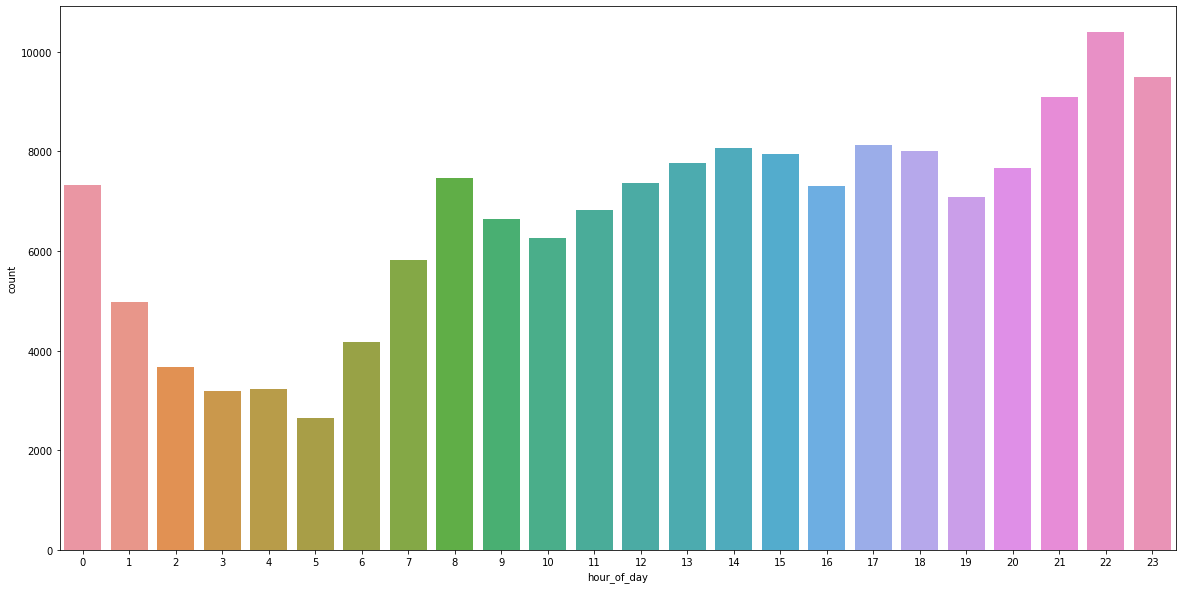

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(data['year'])

plt.figure(figsize = (20, 10))
sns.countplot(data['month'])

plt.figure(figsize = (20, 10))
sns.countplot(data['day_of_week'])

plt.figure(figsize = (20, 10))
sns.countplot(data['hour_of_day'])

In [ ]:
def f(x):
    if (x >=5) and (x <= 11):
        return 'morning'
    elif (x >=12) and (x <=16 ):
        return 'afternoon'
    elif (x >= 17) and (x <= 20):
        return'evening'
    elif (x >=21) and (x <= 23) :
        return 'night_PM'
    elif (x >=0) and (x <=4):
        return'night_AM'

def g(x):
    if (x >=3) and (x <= 5):
        return 'spring'
    elif (x >=6) and (x <=8 ):
        return 'summer'
    elif (x >= 9) and (x <= 11):
        return'fall'
    elif (x >=12)|(x <= 2) :
        return 'winter'
        
def h(x):
    if (x >=0) and (x <= 4):
        return 'weekday'
    elif (x >=5) and (x <=6 ):
        return 'weekend'

In [ ]:
data['session'] = data['hour_of_day'].apply(f)
data['seasons'] = data['month'].apply(g)
data['week'] = data['day_of_week'].apply(h)

In [ ]:
data.shape

(160548, 22)

In [ ]:
data.columns

Index(['id', 'trip_distance', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount',
       'passenger_count', 'fare_amount', 'session', 'seasons', 'week'],
      dtype='object')

2. Feature Engineering for passenger count 

Because models in scikit learn require numerical input, if dataset contains categorical variables then we have to encode them. Thus, we will use encoding technique for passenger count

In [ ]:
data['passenger_count'].describe()

count    160548.000000
mean          3.999664
std           0.316890
min           1.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           7.000000
Name: passenger_count, dtype: float64

"get_dummies" converts categorical data into dummy or indicator value

In [ ]:
temp = pd.get_dummies(data['passenger_count'], prefix = 'passenger_count')
data = data.join(temp)

temp = pd.get_dummies(data['seasons'], prefix = 'season')
data = data.join(temp)

temp = pd.get_dummies(data['week'], prefix = 'week')
data = data.join(temp)

temp = pd.get_dummies(data['session'], prefix = 'session')
data = data.join(temp)

temp = pd.get_dummies(data['year'], prefix = 'year')
data = data.join(temp)


In [ ]:
data.head()

,id,trip_distance,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,...,season_summer,season_winter,week_weekday,week_weekend,session_afternoon,session_evening,session_morning,session_night_AM,session_night_PM,year_2018
1,4,14.45,0.0,0.5,10.41,5.76,0.3,62.47,87,138,...,0,0,1,0,1,0,0,0,0,1
2,5,11.60,0.0,0.5,14.57,5.76,0.3,63.13,68,138,...,0,0,1,0,1,0,0,0,0,1
27,78,7.93,0.5,0.5,5.66,0.00,0.3,33.96,48,244,...,0,0,1,0,0,0,0,0,1,1
49,104,3.61,0.0,0.5,6.26,0.00,0.3,37.56,90,238,...,0,0,1,0,1,0,0,0,0,1
84,139,9.47,0.0,0.5,5.76,0.00,0.3,34.56,13,263,...,1,0,1,0,0,0,1,0,0,1


In [ ]:
data.columns

Index(['id', 'trip_distance', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount',
       'passenger_count', 'fare_amount', 'session', 'seasons', 'week',
       'passenger_count_1.0', 'passenger_count_2.0', 'passenger_count_3.0',
       'passenger_count_4.0', 'passenger_count_5.0', 'passenger_count_6.0',
       'passenger_count_7.0', 'season_fall', 'season_spring', 'season_summer',
       'season_winter', 'week_weekday', 'week_weekend', 'session_afternoon',
       'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'year_2018'],
      dtype='object')

In [ ]:
data

,id,trip_distance,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,...,season_summer,season_winter,week_weekday,week_weekend,session_afternoon,session_evening,session_morning,session_night_AM,session_night_PM,year_2018
1,4,14.45,0.0,0.5,10.41,5.76,0.3,62.47,87,138,...,0,0,1,0,1,0,0,0,0,1
2,5,11.60,0.0,0.5,14.57,5.76,0.3,63.13,68,138,...,0,0,1,0,1,0,0,0,0,1
27,78,7.93,0.5,0.5,5.66,0.00,0.3,33.96,48,244,...,0,0,1,0,0,0,0,0,1,1
49,104,3.61,0.0,0.5,6.26,0.00,0.3,37.56,90,238,...,0,0,1,0,1,0,0,0,0,1
84,139,9.47,0.0,0.5,5.76,0.00,0.3,34.56,13,263,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,1090727,6.60,0.5,0.5,5.95,0.00,0.3,35.75,48,49,...,0,0,1,0,0,0,0,0,1,1
1048564,1090729,11.11,0.5,0.5,6.86,0.00,0.3,41.16,13,14,...,0,0,1,0,0,0,0,0,1,1
1048568,1090733,6.00,0.0,0.5,5.01,0.00,0.3,36.31,88,161,...,0,0,1,0,0,0,1,0,0,1
1048569,1090734,5.87,0.0,0.5,4.56,0.00,0.3,27.36,13,233,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
pd.DataFrame(data.isna().sum())

,0
id,0
trip_distance,0
extra,0
mta_tax,0
tip_amount,0
tolls_amount,0
imp_surcharge,0
total_amount,0
pickup_location_id,0
dropoff_location_id,0


We will remove the variables which were used to feature engineer new variables

In [ ]:
data = data.drop(['pickup_location_id', 'passenger_count', 'year', 'month', 'day_of_week', 'hour_of_day', 'session', 'seasons', 'week'],axis=1)

In [ ]:
data.shape

(160548, 32)

In [ ]:
data.columns

Index(['id', 'trip_distance', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'dropoff_location_id', 'day',
       'trip_duration', 'calculated_total_amount', 'fare_amount',
       'passenger_count_1.0', 'passenger_count_2.0', 'passenger_count_3.0',
       'passenger_count_4.0', 'passenger_count_5.0', 'passenger_count_6.0',
       'passenger_count_7.0', 'season_fall', 'season_spring', 'season_summer',
       'season_winter', 'week_weekday', 'week_weekend', 'session_afternoon',
       'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'year_2018'],
      dtype='object')

In [ ]:
data.head()

,id,trip_distance,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,dropoff_location_id,day,...,season_summer,season_winter,week_weekday,week_weekend,session_afternoon,session_evening,session_morning,session_night_AM,session_night_PM,year_2018
1,4,14.45,0.0,0.5,10.41,5.76,0.3,62.47,138,29,...,0,0,1,0,1,0,0,0,0,1
2,5,11.60,0.0,0.5,14.57,5.76,0.3,63.13,138,29,...,0,0,1,0,1,0,0,0,0,1
27,78,7.93,0.5,0.5,5.66,0.00,0.3,33.96,244,8,...,0,0,1,0,0,0,0,0,1,1
49,104,3.61,0.0,0.5,6.26,0.00,0.3,37.56,238,30,...,0,0,1,0,1,0,0,0,0,1
84,139,9.47,0.0,0.5,5.76,0.00,0.3,34.56,263,3,...,1,0,1,0,0,0,1,0,0,1


Feature Selection

1.Correlation Analysis

Statistically correlated: features move together directionally.
Linear models assume feature independence.
And if features are correlated that could introduce bias into our models.

We will plot a Heatmap of correlation whereas, correlation measures how strongly 2 quantities are related to each other

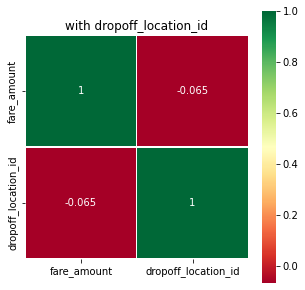

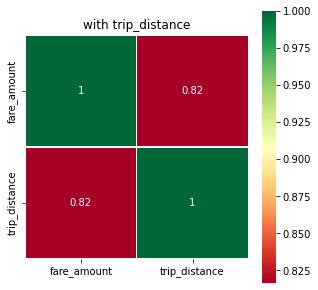

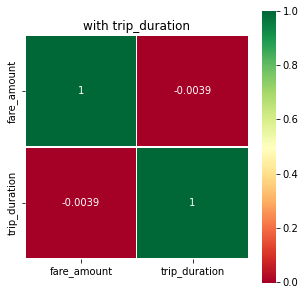

<function matplotlib.pyplot.show(*args, **kw)>

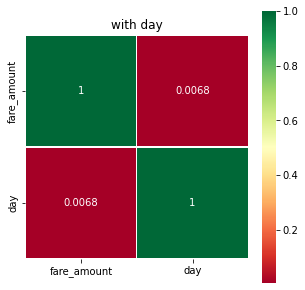

In [ ]:
cat_var=['season_spring', 'season_summer',
       'season_winter', 'week_weekend',
       'session_evening', 'session_morning', 'session_night_AM',
       'session_night_PM', 'year_2018']

num_var=['fare_amount','dropoff_location_id']
data[cat_var]=data[cat_var].apply(lambda x: x.astype('category') )
plt.figure(figsize = (5, 5))
_ = sns.heatmap(data[num_var].corr(), square = True, cmap = 'RdYlGn', linewidths = 0.5, linecolor = 'w', annot = True)
plt.title('with dropoff_location_id')
plt.show()


num_var=['fare_amount','trip_distance']
data[cat_var]=data[cat_var].apply(lambda x: x.astype('category') )
plt.figure(figsize = (5, 5))
_ = sns.heatmap(data[num_var].corr(), square = True, cmap = 'RdYlGn', linewidths = 0.5, linecolor = 'w', annot = True)
plt.title('with trip_distance')
plt.show()

num_var=['fare_amount','trip_duration']
data[cat_var]=data[cat_var].apply(lambda x: x.astype('category') )
plt.figure(figsize = (5, 5))
_ = sns.heatmap(data[num_var].corr(), square = True, cmap = 'RdYlGn', linewidths = 0.5, linecolor = 'w', annot = True)
plt.title('with trip_duration')
plt.show()

num_var=['fare_amount','day']
data[cat_var]=data[cat_var].apply(lambda x: x.astype('category') )
plt.figure(figsize = (5, 5))
_ = sns.heatmap(data[num_var].corr(), square = True, cmap = 'RdYlGn', linewidths = 0.5, linecolor = 'w', annot = True)
plt.title('with day')
plt.show


Feature Scaling Check with or without normalization of standarscalar

In [ ]:
data[num_var].var()

fare_amount    198.541408
day             73.605300
dtype: float64

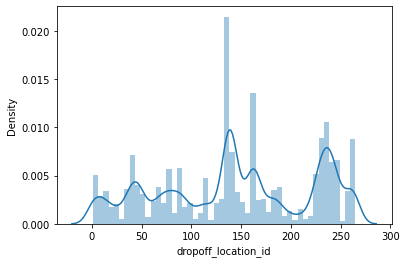

In [ ]:
sns.distplot(data['dropoff_location_id'], bins = 50)

In [ ]:
value = data['id'].quantile(0.98)
value = data['id'].quantile(0.98)

data = data.replace(np.inf, value)

In [ ]:
data

,id,trip_distance,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,dropoff_location_id,day,...,season_summer,season_winter,week_weekday,week_weekend,session_afternoon,session_evening,session_morning,session_night_AM,session_night_PM,year_2018
1,4,14.45,0.0,0.5,10.41,5.76,0.3,62.47,138,29,...,0,0,1,0,1,0,0,0,0,1
2,5,11.60,0.0,0.5,14.57,5.76,0.3,63.13,138,29,...,0,0,1,0,1,0,0,0,0,1
27,78,7.93,0.5,0.5,5.66,0.00,0.3,33.96,244,8,...,0,0,1,0,0,0,0,0,1,1
49,104,3.61,0.0,0.5,6.26,0.00,0.3,37.56,238,30,...,0,0,1,0,1,0,0,0,0,1
84,139,9.47,0.0,0.5,5.76,0.00,0.3,34.56,263,3,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,1090727,6.60,0.5,0.5,5.95,0.00,0.3,35.75,49,3,...,0,0,1,0,0,0,0,0,1,1
1048564,1090729,11.11,0.5,0.5,6.86,0.00,0.3,41.16,14,3,...,0,0,1,0,0,0,0,0,1,1
1048568,1090733,6.00,0.0,0.5,5.01,0.00,0.3,36.31,161,4,...,0,0,1,0,0,0,1,0,0,1
1048569,1090734,5.87,0.0,0.5,4.56,0.00,0.3,27.36,233,4,...,0,0,1,0,0,0,1,0,0,1


Random forest regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X = data.drop('fare_amount', axis = 1)
y = pd.DataFrame(data['fare_amount'])

In [ ]:
X.head()

,id,trip_distance,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,dropoff_location_id,day,...,season_summer,season_winter,week_weekday,week_weekend,session_afternoon,session_evening,session_morning,session_night_AM,session_night_PM,year_2018
1,4,14.45,0.0,0.5,10.41,5.76,0.3,62.47,138,29,...,0,0,1,0,1,0,0,0,0,1
2,5,11.60,0.0,0.5,14.57,5.76,0.3,63.13,138,29,...,0,0,1,0,1,0,0,0,0,1
27,78,7.93,0.5,0.5,5.66,0.00,0.3,33.96,244,8,...,0,0,1,0,0,0,0,0,1,1
49,104,3.61,0.0,0.5,6.26,0.00,0.3,37.56,238,30,...,0,0,1,0,1,0,0,0,0,1
84,139,9.47,0.0,0.5,5.76,0.00,0.3,34.56,263,3,...,1,0,1,0,0,0,1,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (112383, 31)
The shape of X_test is: (48165, 31)
The shape of y_train is: (112383, 1)
The shape of y_test is: (48165, 1)


In [ ]:
rf_reg = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 4, max_features = 'auto', max_depth = 9, bootstrap = True)
rf_reg.fit(X_train,y_train)
# Compute and print the coefficients
Forest_features = rf_reg.feature_importances_
print(Forest_features)

[3.02971830e-04 1.41125021e-02 5.72554921e-05 1.66266121e-05
 2.67388814e-02 1.35677327e-02 0.00000000e+00 9.43646781e-01
 6.12687475e-04 3.40082754e-04 2.30168112e-04 1.15889635e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.78486583e-05
 1.15681373e-05 5.95314786e-06 2.43282487e-06 1.92001919e-06
 1.41326573e-05 3.92707019e-05 1.88804745e-05 6.11907882e-06
 1.39607195e-04 6.87509758e-07 0.00000000e+00]


In [ ]:
y_pred = rf_reg.predict(X_test)

In [ ]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.5717296699015707
Mean Squared Error (MSE): 2.9074675889045847
Root Mean Squared Error (RMSE): 1.7051297865278716


In [ ]:
random_grid = {'n_estimators' : range(100, 500, 100), 'max_depth': range(5, 20, 1), 'min_samples_leaf' : range(2, 5, 1), 'max_features' : ['auto', 'sqrt', 'log2'], 'bootstrap' : [True, False], 'min_samples_split' : range(2, 5, 1)}

Forest = RandomForestRegressor()

Forest_cv = RandomizedSearchCV(Forest, random_grid, cv = 5)
X
Forest_cv.fit(X.iloc[1:200,:], y.iloc[1:200,:])

print("Accuracy: {}".format(Forest_cv.best_score_))

Accuracy: 0.911200387891868


Decision Tree



[2.08412544e-03 5.96092165e-01 0.00000000e+00 0.00000000e+00
 2.02038533e-02 2.88270666e-04 0.00000000e+00 3.65475394e-01
 1.35187757e-03 1.08863679e-03 1.05519626e-02 4.57897703e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.54776044e-04 0.00000000e+00
 6.88514236e-04 0.00000000e+00 7.56174458e-04 0.00000000e+00
 6.35307253e-06 0.00000000e+00 0.00000000e+00]


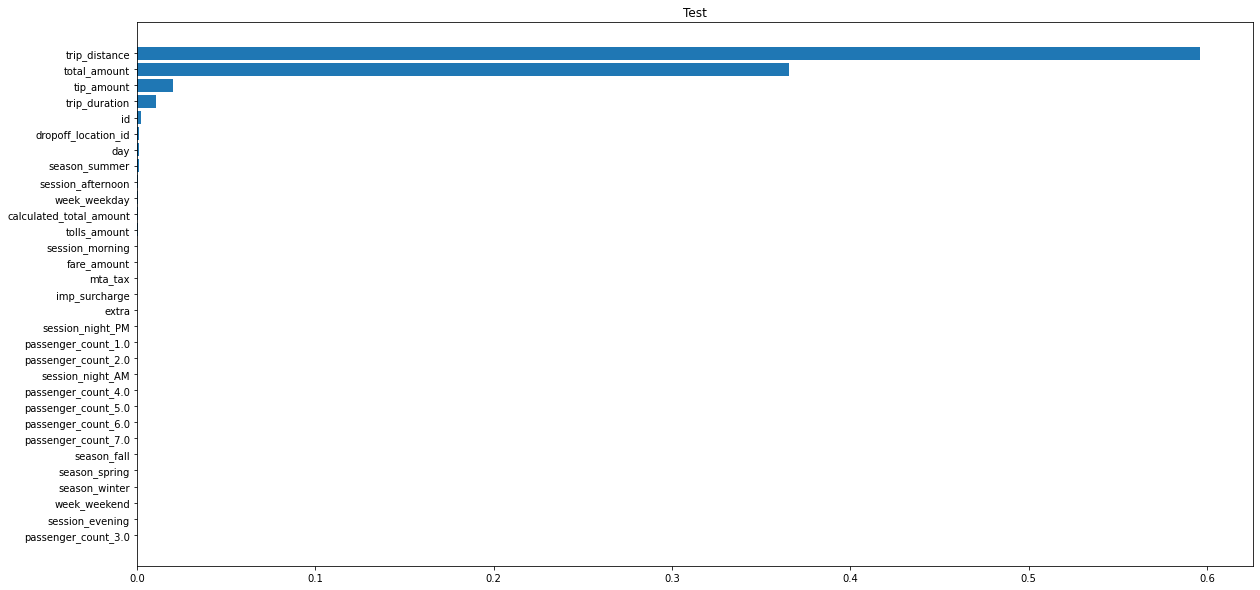

In [ ]:
tree = DecisionTreeRegressor(max_depth= 6, min_samples_split=2)

tree.fit(X_train.iloc[1:200,:],y_train.iloc[1:200,:])

# Compute and print the coefficients
tree_features = tree.feature_importances_
print(tree_features)

# Sort test importances in descending order
indices = np.argsort(tree_features)[::1]

# Rearrange test names so they match the sorted test importances
names = [data.columns[i] for i in indices]
y_pred = tree.predict(X_test)
# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("Test")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),tree_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.savefig('Decision Tree')
plt.show()

In [ ]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 2.7360067880040133
Mean Squared Error (MSE): 54.33631630299698
Root Mean Squared Error (RMSE): 7.3713171348814575


In [ ]:
param_dist = {'max_depth': range(2, 16, 2), 'min_samples_split': range(2, 16, 2)}

tree = DecisionTreeRegressor()

tree_cv = GridSearchCV(tree, param_dist, cv=5)

tree_cv.fit(X.iloc[1:200,:], y.iloc[1:200,:])

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Accuracy: {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 8, 'min_samples_split': 12}
Accuracy: 0.906417284632232


In [ ]:
y_pred

array([25.4       , 64.        , 26.65789474, ..., 23.15217391,
       26.65789474, 22.1       ])

PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaling=StandardScaler()
scaling.fit(data)
Scaled_data=scaling.transform(data)
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
print(x.shape)


(160548, 3)


Text(0, 0.5, 'pc2')

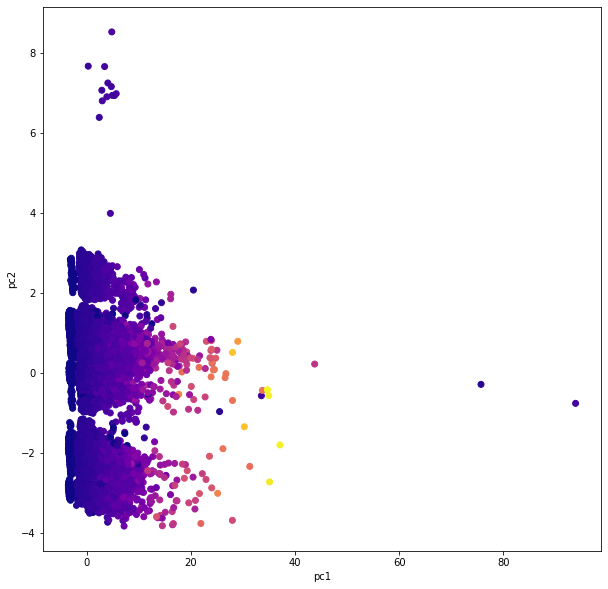

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=data['fare_amount'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')


Text(0.5, 0, 'PC3')

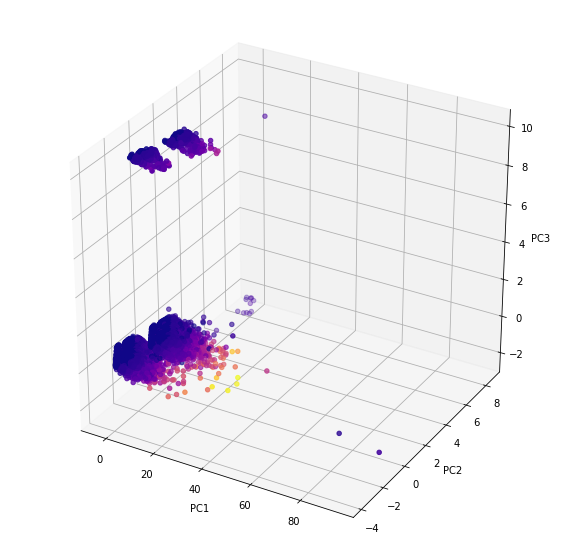

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')

axis.scatter(x[:,0],x[:,1],x[:,2], c=data['fare_amount'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)


[[-1.72591371  1.52217358 -0.84277258 ... -0.40247377 -0.46928587
   0.        ]
 [-1.72591053  0.84491897 -0.84277258 ... -0.40247377 -0.46928587
   0.        ]
 [-1.7256785  -0.02719487  0.45423811 ... -0.40247377  2.13089731
   0.        ]
 ...
 [ 1.74086574 -0.48582695 -0.84277258 ... -0.40247377 -0.46928587
   0.        ]
 [ 1.74086892 -0.51671926 -0.84277258 ... -0.40247377 -0.46928587
   0.        ]
 [ 1.74088481 -0.22443043 -0.84277258 ... -0.40247377 -0.46928587
   0.        ]]
[[ 1.13048801]
 [ 0.88209244]
 [-0.18246001]
 ...
 [ 0.06593556]
 [-0.53731083]
 [-0.11148985]]


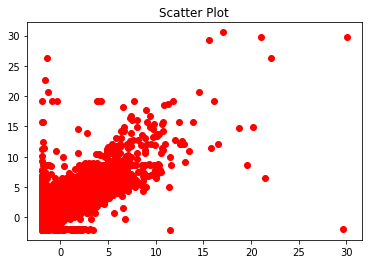

[0.3572435 0.3572435 0.3572435 ... 0.3572435 0.3572435 0.3572435]
[[0.3572435]
 [0.3572435]
 [0.3572435]
 ...
 [0.3572435]
 [0.3572435]
 [0.3572435]]
[[0.3572435]
 [0.3572435]
 [0.3572435]
 ...
 [0.3572435]
 [0.3572435]
 [0.3572435]]


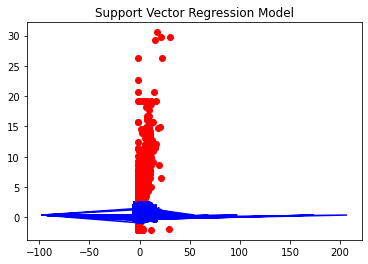

In [ ]:
StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
y = StdS_y.fit_transform(y)
print(X)
print(y)
plt.scatter(X[:,1], y, color = 'red') # plotting the training set
plt.title('Scatter Plot') # adding a tittle to our plot
plt.show() 
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X[1:200,:], y[1:200,:])
y_pred=regressor.predict(X_test)
print(y_pred)
y_pred = y_pred.reshape(-1,1)
y_pred1 = StdS_y.inverse_transform(y_pred)
print(y_pred1)
y_pred2 = StdS_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
print(y_pred2)
plt.scatter(StdS_X.inverse_transform(X)[:,1], StdS_y.inverse_transform(y), color = 'red')
plt.plot(StdS_X.inverse_transform(X), StdS_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
# add the title to the plot
plt.title('Support Vector Regression Model')
plt.show()

In [ ]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 29.197928430094024
Mean Squared Error (MSE): 1049.6276040401488
Root Mean Squared Error (RMSE): 32.39795678804681
